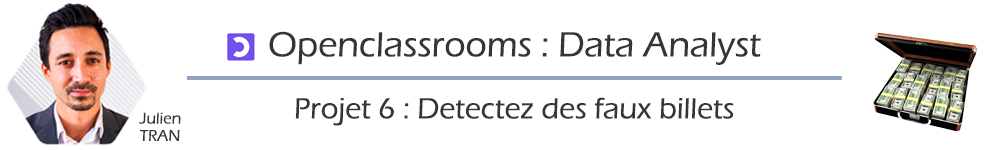

### Mission 2 :

Appliquez un algorithme de classification, puis analysez le résultat obtenu.

Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

### Sommaire // Mission 2 💶

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Classification par Kmeans](#3)
    * [3.1.Determination du nombre de clusters par la méthode silouhette](#3.1)
    * [3.2.Kmeans sur les données centrées réduites](#3.2)
    * [3.3.Comparaison Kmeans / is_genuine](#3.3)
    * [3.4.Projections sur le plan factoriel](#3.4)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#install.packages('summarytools')
#install.packages('ggfortify')
#install.packages('ggplot2')
#install.packages('ggcorrplot')
#install.packages('broom')
#install.packages('pander')
#install.packages('tidyverse')
#install.packages('cluster')
#install.packages('NbClust')
#install.packages('yardstick')
#install.packages('repr')

In [2]:
#j'importe les librairies qui vont me servir plus tard

#library(tidyverse)
library(yardstick)
library(cluster)
library(NbClust)
library(factoextra)
library(FactoMineR)
library(ggplot2)
library(ggfortify)
library(ggcorrplot)
library(summarytools)
library(broom)
library(pander)
library(repr)

Warning message:
"package 'yardstick' was built under R version 3.6.3"For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.
Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')
Warning message:
"package 'pander' was built under R version 3.6.3"Warning message:
"package 'repr' was built under R version 3.6.3"

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [3]:
#notes2 <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', row.names=1, encoding="UTF-8")
notes <- read.csv("C:/Users/33643/Desktop/P6/CSV/notes.csv", sep= ',', head = TRUE, encoding="UTF-8")

#j'ajoute une colonne num billet
notes["num_billet"] <- seq(1,170)

head(notes)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,num_billet
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,True,171.81,104.86,104.95,4.52,2.89,112.83,1
2,True,171.67,103.74,103.70,4.01,2.87,113.29,2
3,True,171.83,103.76,103.76,4.40,2.88,113.84,3
4,True,171.80,103.78,103.65,3.73,3.12,113.63,4
5,True,172.05,103.70,103.75,5.04,2.27,113.55,5
6,True,172.57,104.65,104.44,4.54,2.99,113.16,6


In [4]:
#Je tranforme la colonne is_genuine en données numérique
#notes$is_genuine <- as.numeric(notes$is_genuine)

#Je transforme la colonne is_genuine en 0 et 1 (False/True)
notes$is_genuine <- ifelse(notes$is_genuine == "False",0,1)

#je supprime les colonnes que je n'tuiliserai pas
notes2 <- notes[,c(1,2,3,4,5,6,7)]
notes3 <- notes[,c(2,3,4,5,6,7)]
head(notes2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,171.81,104.86,104.95,4.52,2.89,112.83
2,1,171.67,103.74,103.70,4.01,2.87,113.29
3,1,171.83,103.76,103.76,4.40,2.88,113.84
4,1,171.80,103.78,103.65,3.73,3.12,113.63
5,1,172.05,103.70,103.75,5.04,2.27,113.55
6,1,172.57,104.65,104.44,4.54,2.99,113.16


## 3.Classification par Kmeans <a class="anchor" id="3"></a>

## 3.1.Determination du nombre de clusters par la méthode silouhette <a class="anchor" id="3.1"></a>

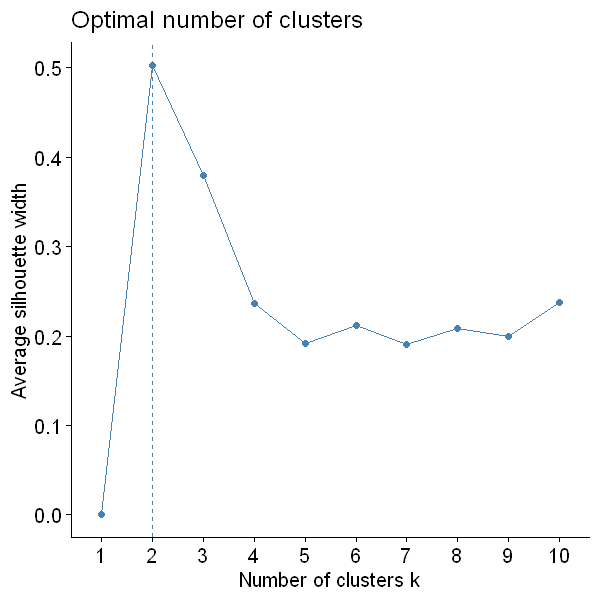

In [5]:
options(repr.plot.width=5, repr.plot.height=5)

fviz_nbclust(notes3,kmeans, method = "silhouette")

## 3.2.Kmeans sur les données centrées réduites <a class="anchor" id="3.2"></a>

In [6]:
#centrage réduction des données
#pour éviter que variables à forte variance pèsent indûment sur les résultats
notes3_cr <- scale(notes3,center=T,scale=T)

groupes.kmeans <- kmeans(notes3_cr,centers=2,nstart=25)
#affichage des résultats
print(groupes.kmeans)

K-means clustering with 2 clusters of sizes 77, 93

Cluster means:
     diagonal height_left height_right margin_low  margin_up     length
1 -0.06393490   0.6446278    0.7186422  0.8134553  0.6405718 -0.8752392
2  0.05293535  -0.5337241   -0.5950049 -0.6735060 -0.5303659  0.7246604

Clustering vector:
  [1] 1 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 312.2003 311.3286
 (between_SS / total_SS =  38.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [7]:
#j'ajoute les clusters à ma table notes2
notes2$clusters <- groupes.kmeans$cluster
head(notes2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,clusters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,171.81,104.86,104.95,4.52,2.89,112.83,1
2,1,171.67,103.74,103.70,4.01,2.87,113.29,2
3,1,171.83,103.76,103.76,4.40,2.88,113.84,2
4,1,171.80,103.78,103.65,3.73,3.12,113.63,2
5,1,172.05,103.70,103.75,5.04,2.27,113.55,2
6,1,172.57,104.65,104.44,4.54,2.99,113.16,1


## 3.3.Comparaison Kmeans / is_genuine <a class="anchor" id="3.3"></a>

In [8]:
#Je créé une crosstable avec mes colonnes is_genuine et clusters
ctable <- table(notes2$is_genuine, notes2$clusters)

#je renomme mes noms de colonnes et index
rownames(ctable) <- c("False","True")
colnames(ctable) <- c("cluster 1","cluster 2")
ctable

       
        cluster 1 cluster 2
  False        69         1
  True          8        92

integer(0)

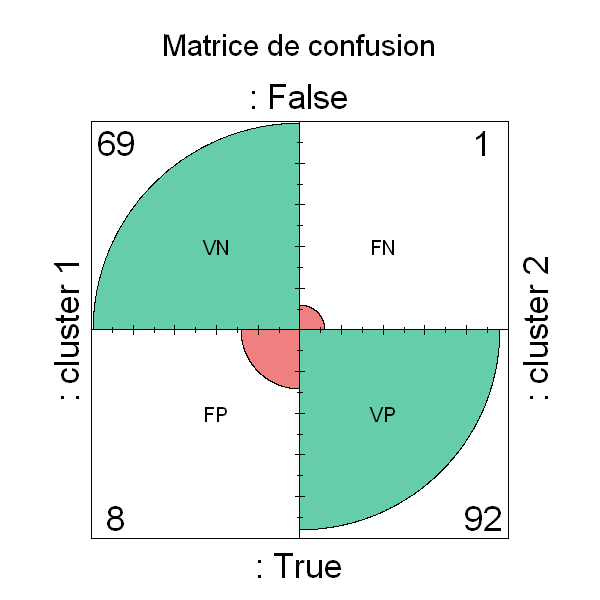

In [15]:
options(repr.plot.width=5, repr.plot.height=5)

#Je créé une matrice de confusion
fourfoldplot(ctable, color = c("light coral", "medium aqua marine"),
             conf.level = 0, margin = 1, main = "Matrice de confusion") + 
text(-0.4,0.4, "VN", cex=1) + 
text(0.4, -0.4, "VP", cex=1) + 
text(0.4,0.4, "FN", cex=1) + 
text(-0.4, -0.4, "FP", cex=1)

On vérifie le nombre d'individus vrais détectés faux avec une matrice de confusion.

La prédiction par clusterisation me donne 92 billets vrais positifs, 8 billets faux positifs, 69 billets vrais négatif et 1 billet faux négatif.

Précision de matrice de confusion : J'ai a une précision de 94%, ce qui est excellent.

In [10]:
(ctable[[1,1]] + ctable[[2,2]]) / sum(ctable)

[1] 0.9470588

## 3.4.Projections sur le plan factoriel <a class="anchor" id="3.4"></a>

In [11]:
notes4 <- notes2[,c(2,3,4,5,6,7)]
head(notes4)

,diagonal,height_left,height_right,margin_low,margin_up,length
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,171.81,104.86,104.95,4.52,2.89,112.83
2,171.67,103.74,103.70,4.01,2.87,113.29
3,171.83,103.76,103.76,4.40,2.88,113.84
4,171.80,103.78,103.65,3.73,3.12,113.63
5,172.05,103.70,103.75,5.04,2.27,113.55
6,172.57,104.65,104.44,4.54,2.99,113.16


In [12]:
groupe <- as.factor(notes2$clusters)

In [13]:
acp <- PCA(notes4, scale.unit = T,ncp = 7)
head(acp)

$eig
       eigenvalue percentage of variance cumulative percentage of variance
comp 1  2.8468752              47.447921                          47.44792
comp 2  1.3174264              21.957106                          69.40503
comp 3  0.8540715              14.234524                          83.63955
comp 4  0.5115777               8.526295                          92.16585
comp 5  0.2767693               4.612822                          96.77867
comp 6  0.1932799               3.221331                         100.00000

$var
$var$coord
                  Dim.1      Dim.2       Dim.3       Dim.4      Dim.5
diagonal      0.1236346  0.8948635 -0.08215244 -0.40034612  0.1184196
height_left   0.8022997  0.3893886  0.11345001  0.19887167 -0.3766378
height_right  0.8298348  0.2703538  0.14216371  0.32825381  0.2562014
margin_low    0.7272578 -0.3679098  0.47391620 -0.16202319  0.1640912
margin_up     0.5948294 -0.1619761 -0.75887278  0.09680115  0.1020310
length       -0.7852090  0.361022

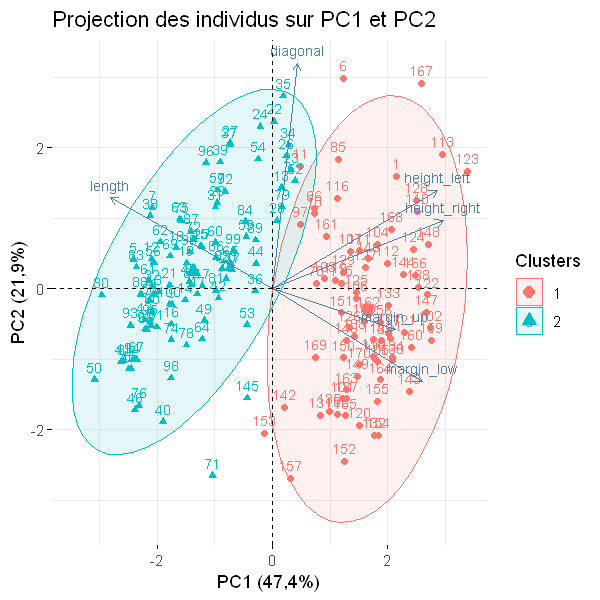

In [16]:
options(repr.plot.width=5, repr.plot.height=5)

fviz_pca_biplot(acp, axes = c(1,2), col.ind = groupe,
             addEllipses = TRUE, labelsize = 3,title = "Projection des individus sur PC1 et PC2",legend.title = "Clusters") +
             labs(x = "PC1 (47,4%)", y = "PC2 (21,9%)")